In [21]:
import pandas as pd
import os
import datetime
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
from matplotlib.patches import ConnectionPatch
import mplcyberpunk

In [22]:
%matplotlib inline 

In [23]:
#create mplscrime dataframe
standish_crime = os.path.join("standish.csv")
standish_df=pd.read_csv(standish_crime)

In [24]:
standish_df['Reported_Date'] = pd.to_datetime(standish_df.Reported_Date)

standish_df.head()


,Unnamed: 0,Case_Number,Case_NumberAlt,Reported_Date,Occurred_Date,NIBRS_Crime_Against,Offense_Category,Offense,Problem_Initial,Problem_Final,Address,Precinct,Neighborhood,Latitude,Longitude,Date_Occurred,Time_Occurred,Date_Reported,Time_Reported
0,4,20-703897,MP2020703897,2020-07-12 11:24:00+00:00,2020-07-12 09:30:00+00:00,Property,Larceny/Theft Offenses,All Other Larceny,NaN,NaN,0032XX 37TH ST E,3.0,Standish,44.93595,-93.22609,2020-07-12,09:30:00,2020-07-12,11:24:00
1,42,21-101731,MP2021101731,2021-05-14 10:37:00+00:00,2021-05-14 00:00:00+00:00,Property,Larceny/Theft Offenses,Theft of Motor Vehicle Parts or Accessories,Disturbance (P),Theft - Report Only (P),0039XX 24TH AVE S,3.0,Standish,44.93141,-93.23719,2021-05-14,00:00:00,2021-05-14,10:37:00
2,350,19-223202,MP2019223202,2019-07-28 20:47:00+00:00,2019-07-28 16:47:00+00:00,Person,Sex Offenses,Sex Offenses,Crim Sex Conduct/Report (P),Crim Sex Conduct/Report (P),0037XX 25TH AVE S,3.0,Standish,44.93501,-93.23592,2019-07-28,16:47:00,2019-07-28,20:47:00
3,412,20-289454,MP2020289454,2020-11-14 23:58:00+00:00,2020-11-14 23:00:00+00:00,Property,Motor Vehicle Theft,Motor Vehicle Theft,Auto Theft (P),Auto Theft (P),0037XX 29TH AVE S,3.0,Standish,44.93501,-93.23085,2020-11-14,23:00:00,2020-11-14,23:58:00
4,532,21-708610,MP2021708610,2021-10-23 17:18:00+00:00,2021-10-23 03:00:00+00:00,Property,Burglary/Breaking & Entering,Burglary/Breaking & Entering,NaN,NaN,0041XX STANDISH AVE,3.0,Standish,44.92781,-93.23973,2021-10-23,03:00:00,2021-10-23,17:18:00


In [25]:
#Convert to dt
standish_df['Occurred_Date'] = pd.to_datetime(standish_df.Occurred_Date, format='%Y-%m-%d %H:%M:%S.%f')
#standish_df['Occurred_Date'] = pd.to_datetime(standish_df.Occurred_Date)
#setting the date to the index
#standish_df.index=pd.DatetimeIndex(standish_df.Occurred_Date)
standish_df.set_index(standish_df.Occurred_Date, drop=True, inplace=True)
#standish_df.drop(standish_df.columns[7], axis=1)

standish_df.head()


,Unnamed: 0,Case_Number,Case_NumberAlt,Reported_Date,Occurred_Date,NIBRS_Crime_Against,Offense_Category,Offense,Problem_Initial,Problem_Final,Address,Precinct,Neighborhood,Latitude,Longitude,Date_Occurred,Time_Occurred,Date_Reported,Time_Reported
Occurred_Date,,,,,,,,,,,,,,,,,,,
2020-07-12 09:30:00+00:00,4,20-703897,MP2020703897,2020-07-12 11:24:00+00:00,2020-07-12 09:30:00+00:00,Property,Larceny/Theft Offenses,All Other Larceny,NaN,NaN,0032XX 37TH ST E,3.0,Standish,44.93595,-93.22609,2020-07-12,09:30:00,2020-07-12,11:24:00
2021-05-14 00:00:00+00:00,42,21-101731,MP2021101731,2021-05-14 10:37:00+00:00,2021-05-14 00:00:00+00:00,Property,Larceny/Theft Offenses,Theft of Motor Vehicle Parts or Accessories,Disturbance (P),Theft - Report Only (P),0039XX 24TH AVE S,3.0,Standish,44.93141,-93.23719,2021-05-14,00:00:00,2021-05-14,10:37:00
2019-07-28 16:47:00+00:00,350,19-223202,MP2019223202,2019-07-28 20:47:00+00:00,2019-07-28 16:47:00+00:00,Person,Sex Offenses,Sex Offenses,Crim Sex Conduct/Report (P),Crim Sex Conduct/Report (P),0037XX 25TH AVE S,3.0,Standish,44.93501,-93.23592,2019-07-28,16:47:00,2019-07-28,20:47:00
2020-11-14 23:00:00+00:00,412,20-289454,MP2020289454,2020-11-14 23:58:00+00:00,2020-11-14 23:00:00+00:00,Property,Motor Vehicle Theft,Motor Vehicle Theft,Auto Theft (P),Auto Theft (P),0037XX 29TH AVE S,3.0,Standish,44.93501,-93.23085,2020-11-14,23:00:00,2020-11-14,23:58:00
2021-10-23 03:00:00+00:00,532,21-708610,MP2021708610,2021-10-23 17:18:00+00:00,2021-10-23 03:00:00+00:00,Property,Burglary/Breaking & Entering,Burglary/Breaking & Entering,NaN,NaN,0041XX STANDISH AVE,3.0,Standish,44.92781,-93.23973,2021-10-23,03:00:00,2021-10-23,17:18:00


In [26]:
# clean_df=standish_df.drop(columns=['Date_Reported' , 'Time_Reported' , 'Date_Occurred', 'Time_Occurred', 'Neighborhood'], axis=1)
# clean_df
standish_df.dtypes
# standish_df.head()

Unnamed: 0                           int64
Case_Number                         object
Case_NumberAlt                      object
Reported_Date          datetime64[ns, UTC]
Occurred_Date          datetime64[ns, UTC]
NIBRS_Crime_Against                 object
Offense_Category                    object
Offense                             object
Problem_Initial                     object
Problem_Final                       object
Address                             object
Precinct                           float64
Neighborhood                        object
Latitude                           float64
Longitude                          float64
Date_Occurred                       object
Time_Occurred                       object
Date_Reported                       object
Time_Reported                       object
dtype: object

In [27]:
standish_df.shape

(1553, 19)

In [28]:
standish_df.head()

,Unnamed: 0,Case_Number,Case_NumberAlt,Reported_Date,Occurred_Date,NIBRS_Crime_Against,Offense_Category,Offense,Problem_Initial,Problem_Final,Address,Precinct,Neighborhood,Latitude,Longitude,Date_Occurred,Time_Occurred,Date_Reported,Time_Reported
Occurred_Date,,,,,,,,,,,,,,,,,,,
2020-07-12 09:30:00+00:00,4,20-703897,MP2020703897,2020-07-12 11:24:00+00:00,2020-07-12 09:30:00+00:00,Property,Larceny/Theft Offenses,All Other Larceny,NaN,NaN,0032XX 37TH ST E,3.0,Standish,44.93595,-93.22609,2020-07-12,09:30:00,2020-07-12,11:24:00
2021-05-14 00:00:00+00:00,42,21-101731,MP2021101731,2021-05-14 10:37:00+00:00,2021-05-14 00:00:00+00:00,Property,Larceny/Theft Offenses,Theft of Motor Vehicle Parts or Accessories,Disturbance (P),Theft - Report Only (P),0039XX 24TH AVE S,3.0,Standish,44.93141,-93.23719,2021-05-14,00:00:00,2021-05-14,10:37:00
2019-07-28 16:47:00+00:00,350,19-223202,MP2019223202,2019-07-28 20:47:00+00:00,2019-07-28 16:47:00+00:00,Person,Sex Offenses,Sex Offenses,Crim Sex Conduct/Report (P),Crim Sex Conduct/Report (P),0037XX 25TH AVE S,3.0,Standish,44.93501,-93.23592,2019-07-28,16:47:00,2019-07-28,20:47:00
2020-11-14 23:00:00+00:00,412,20-289454,MP2020289454,2020-11-14 23:58:00+00:00,2020-11-14 23:00:00+00:00,Property,Motor Vehicle Theft,Motor Vehicle Theft,Auto Theft (P),Auto Theft (P),0037XX 29TH AVE S,3.0,Standish,44.93501,-93.23085,2020-11-14,23:00:00,2020-11-14,23:58:00
2021-10-23 03:00:00+00:00,532,21-708610,MP2021708610,2021-10-23 17:18:00+00:00,2021-10-23 03:00:00+00:00,Property,Burglary/Breaking & Entering,Burglary/Breaking & Entering,NaN,NaN,0041XX STANDISH AVE,3.0,Standish,44.92781,-93.23973,2021-10-23,03:00:00,2021-10-23,17:18:00


In [29]:
date_index = standish_df.drop(standish_df.columns[[0, 2, 6, 8, 9, 10, 11, 12, 15, 16, 17, 18]], axis=1)
date_index.head()

,Case_Number,Reported_Date,Occurred_Date,NIBRS_Crime_Against,Offense,Latitude,Longitude
Occurred_Date,,,,,,,
2020-07-12 09:30:00+00:00,20-703897,2020-07-12 11:24:00+00:00,2020-07-12 09:30:00+00:00,Property,All Other Larceny,44.93595,-93.22609
2021-05-14 00:00:00+00:00,21-101731,2021-05-14 10:37:00+00:00,2021-05-14 00:00:00+00:00,Property,Theft of Motor Vehicle Parts or Accessories,44.93141,-93.23719
2019-07-28 16:47:00+00:00,19-223202,2019-07-28 20:47:00+00:00,2019-07-28 16:47:00+00:00,Person,Sex Offenses,44.93501,-93.23592
2020-11-14 23:00:00+00:00,20-289454,2020-11-14 23:58:00+00:00,2020-11-14 23:00:00+00:00,Property,Motor Vehicle Theft,44.93501,-93.23085
2021-10-23 03:00:00+00:00,21-708610,2021-10-23 17:18:00+00:00,2021-10-23 03:00:00+00:00,Property,Burglary/Breaking & Entering,44.92781,-93.23973


In [30]:
date_index.sort_values(by='Reported_Date')
print(date_index)


                          Case_Number             Reported_Date  \
Occurred_Date                                                     
2020-07-12 09:30:00+00:00   20-703897 2020-07-12 11:24:00+00:00   
2021-05-14 00:00:00+00:00   21-101731 2021-05-14 10:37:00+00:00   
2019-07-28 16:47:00+00:00   19-223202 2019-07-28 20:47:00+00:00   
2020-11-14 23:00:00+00:00   20-289454 2020-11-14 23:58:00+00:00   
2021-10-23 03:00:00+00:00   21-708610 2021-10-23 17:18:00+00:00   
...                               ...                       ...   
2022-07-02 16:00:00+00:00   22-148795 2022-07-02 23:02:00+00:00   
2021-07-14 00:00:00+00:00   21-705551 2021-07-27 09:37:00+00:00   
2020-09-13 03:53:00+00:00   20-237232 2020-09-13 04:59:00+00:00   
2020-02-20 07:30:00+00:00   20-045860 2020-02-20 08:10:00+00:00   
2021-11-08 01:11:00+00:00   21-257585 2021-11-08 01:11:00+00:00   

                                      Occurred_Date NIBRS_Crime_Against  \
Occurred_Date                                        

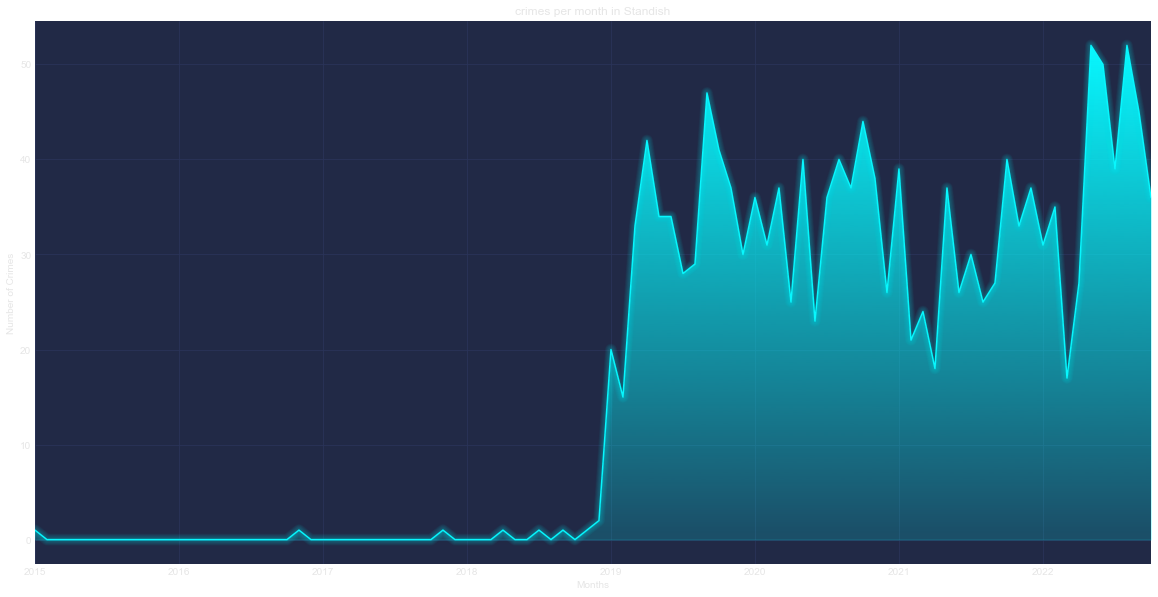

<Figure size 432x288 with 0 Axes>

In [31]:
plt.figure(figsize=(20,10))
date_index.resample('M').size().plot(legend=False)
plt.title('crimes per month in Standish')
plt.xlabel('Months')
plt.ylabel('Number of Crimes')
plt.style.use('cyberpunk')
mplcyberpunk.add_gradient_fill()
mplcyberpunk.add_glow_effects()
mplcyberpunk.add_underglow()
plt.show()
plt.savefig("crimes_per_month.png")

In [32]:
date_index.head()


,Case_Number,Reported_Date,Occurred_Date,NIBRS_Crime_Against,Offense,Latitude,Longitude
Occurred_Date,,,,,,,
2020-07-12 09:30:00+00:00,20-703897,2020-07-12 11:24:00+00:00,2020-07-12 09:30:00+00:00,Property,All Other Larceny,44.93595,-93.22609
2021-05-14 00:00:00+00:00,21-101731,2021-05-14 10:37:00+00:00,2021-05-14 00:00:00+00:00,Property,Theft of Motor Vehicle Parts or Accessories,44.93141,-93.23719
2019-07-28 16:47:00+00:00,19-223202,2019-07-28 20:47:00+00:00,2019-07-28 16:47:00+00:00,Person,Sex Offenses,44.93501,-93.23592
2020-11-14 23:00:00+00:00,20-289454,2020-11-14 23:58:00+00:00,2020-11-14 23:00:00+00:00,Property,Motor Vehicle Theft,44.93501,-93.23085
2021-10-23 03:00:00+00:00,21-708610,2021-10-23 17:18:00+00:00,2021-10-23 03:00:00+00:00,Property,Burglary/Breaking & Entering,44.92781,-93.23973


In [33]:
filtered_df=date_index.loc[(date_index['Occurred_Date']>= '2019-01-01')]
filtered_df.head()

,Case_Number,Reported_Date,Occurred_Date,NIBRS_Crime_Against,Offense,Latitude,Longitude
Occurred_Date,,,,,,,
2020-07-12 09:30:00+00:00,20-703897,2020-07-12 11:24:00+00:00,2020-07-12 09:30:00+00:00,Property,All Other Larceny,44.93595,-93.22609
2021-05-14 00:00:00+00:00,21-101731,2021-05-14 10:37:00+00:00,2021-05-14 00:00:00+00:00,Property,Theft of Motor Vehicle Parts or Accessories,44.93141,-93.23719
2019-07-28 16:47:00+00:00,19-223202,2019-07-28 20:47:00+00:00,2019-07-28 16:47:00+00:00,Person,Sex Offenses,44.93501,-93.23592
2020-11-14 23:00:00+00:00,20-289454,2020-11-14 23:58:00+00:00,2020-11-14 23:00:00+00:00,Property,Motor Vehicle Theft,44.93501,-93.23085
2021-10-23 03:00:00+00:00,21-708610,2021-10-23 17:18:00+00:00,2021-10-23 03:00:00+00:00,Property,Burglary/Breaking & Entering,44.92781,-93.23973


In [34]:
filtered_df.dtypes

Case_Number                         object
Reported_Date          datetime64[ns, UTC]
Occurred_Date          datetime64[ns, UTC]
NIBRS_Crime_Against                 object
Offense                             object
Latitude                           float64
Longitude                          float64
dtype: object

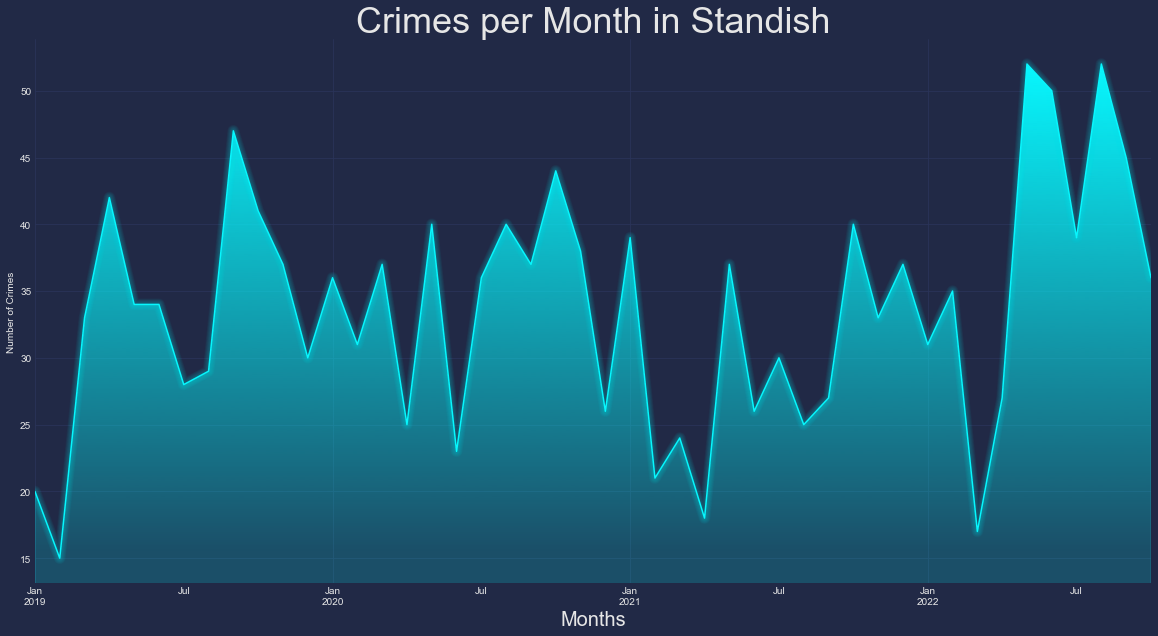

<Figure size 432x288 with 0 Axes>

In [35]:
plt.figure(figsize=(20,10))
filtered_df.resample('M').size().plot(legend=False)
plt.title('Crimes per Month in Standish', fontsize=36)
plt.xlabel('Months', fontsize=20)
plt.ylabel('Number of Crimes')
plt.style.use('cyberpunk')
mplcyberpunk.add_gradient_fill()
mplcyberpunk.add_glow_effects()
mplcyberpunk.add_underglow()
plt.show()
plt.savefig("cpm_cyberpunk.svg", dpi=200)

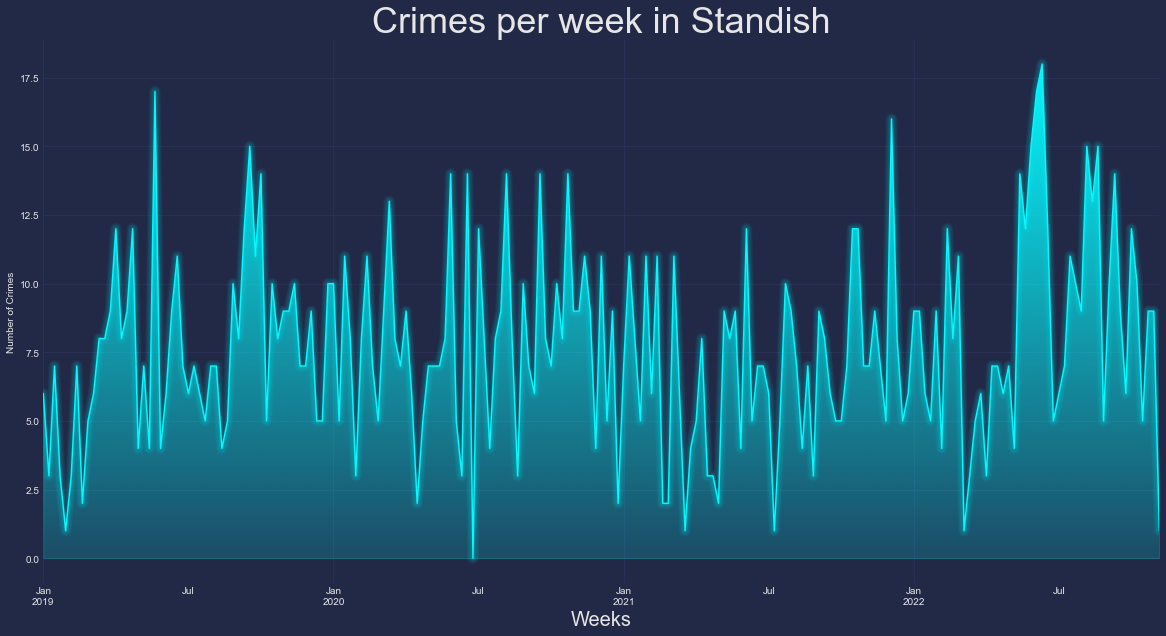

In [36]:
plt.figure(figsize=(20,10))
filtered_df.resample('W').size().plot(legend=False)
plt.title('Crimes per week in Standish', fontsize=36)
plt.xlabel('Weeks', fontsize=20)
plt.ylabel('Number of Crimes')
plt.style.use('cyberpunk')
mplcyberpunk.add_gradient_fill()
mplcyberpunk.add_glow_effects()
mplcyberpunk.add_underglow()
plt.savefig("cpw_cyberpunk.svg", dpi=200)
plt.show()


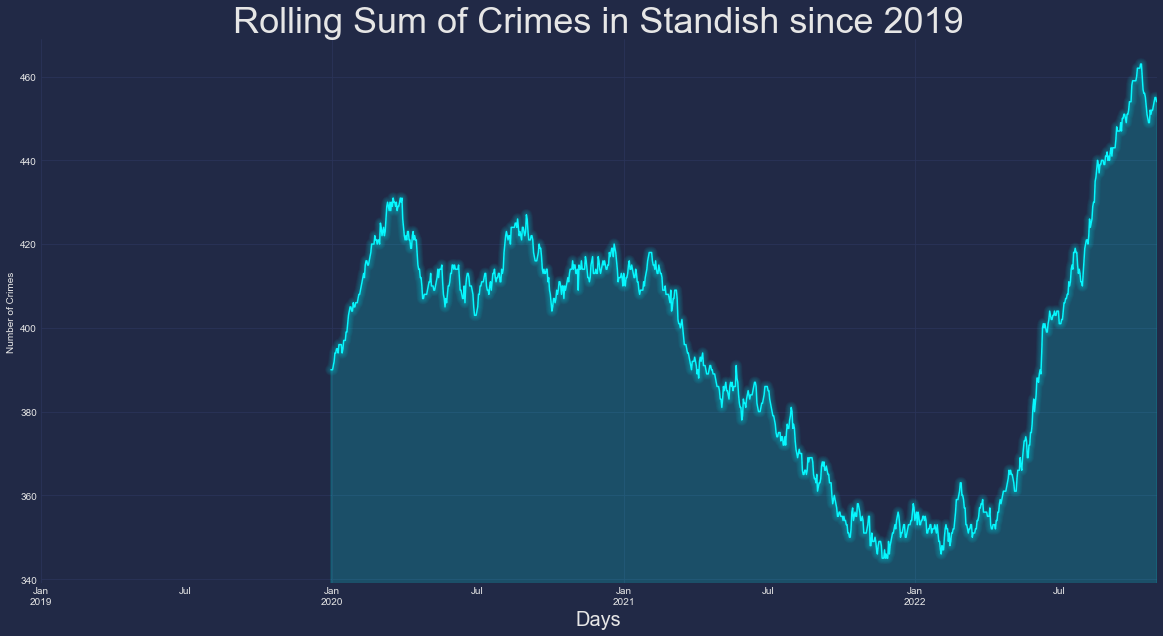

In [38]:
plt.figure(figsize=(20,10))
filtered_df.resample('D').size().rolling(365).sum().plot(legend=False)
plt.title('Rolling Sum of Crimes in Standish since 2019', fontsize=36)
plt.xlabel('Days', fontsize=20)
plt.ylabel('Number of Crimes')
plt.style.use('cyberpunk')
#mplcyberpunk.add_gradient_fill()
mplcyberpunk.add_glow_effects()
mplcyberpunk.add_underglow()
plt.savefig("rolling_cyberpunk.svg", dpi=200)
plt.show()